In [9]:
from pathlib import Path
import sys
import math
import pickle
#
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
from pathlib import Path
import pickle

In [13]:
p_results = [Path("./../train/results_cuda0.pkl"),
             Path("./../train/results_cuda1.pkl")
            ]
p_results = [Path('./../train/results_cuda0_512.pkl')]

In [14]:
results = []
for p_result in p_results:
    with open(p_result, "rb") as file:
        results += pickle.load(file)

In [15]:
len(results)

48

In [16]:
runs_failed = [r for r in results if r[-2] == "failed"]
runs_success = [r for r in results if r[-2] == "success"]
#
print("#Failed: ", len(runs_failed))
print("#Success:", len(runs_success))

#Failed:  0
#Success: 48


In [17]:
show_nans = False
show_acc = True
for config, _, _ in runs_success:
    p_stats = Path(config.paths.experiments) / config.names.model_dir / config.names.stats_file
    if not p_stats.exists():
        print("Does not exist: {}".format(p_stats))
    with open(p_stats, "rb") as file:
        stats = pickle.load(file)
    train_loss = stats["train"]["loss"][-1]
    if math.isnan(train_loss) and show_nans:
        print("bs={:4d}, lr={:.5f}, wd={:.5f}".format(config.train.batch_size, config.optimizer_args.lr, config.optimizer_args.weight_decay))
        #print(max(stats["valid"]["affnist"]["acc"]), stats["notes"], stats["train"]["loss"][-1])
    elif show_acc:
        max_acc = max(stats["valid"]["affnist"]["acc"])
        if max_acc < 0.84:
            continue
        if len(stats["notes"]) > 0 and "nan" in stats["notes"]:
            continue
        print("bs={:4d}, lr={:.5f}, wd={:.5f} rec_weights={:.5f}  max_acc={:.4f} notes={}".format(
            config.train.batch_size,
            config.optimizer_args.lr,
            config.optimizer_args.weight_decay,
            config.loss.rec.weight,
            max_acc,
            stats["notes"]
             )
             )
        print("\t", p_stats)

bs= 512, lr=0.01000, wd=0.00001 rec_weights=1.00000  max_acc=0.8437 notes=['Stopping epoch 38: acc_valid 0.99270 > 0.99220']
	 /mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_10_54_18_0x1dd9/stats.pkl
bs= 512, lr=0.00100, wd=0.00010 rec_weights=1.00000  max_acc=0.8484 notes=[]
	 /mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_29_40_0xd4b/stats.pkl
bs= 512, lr=0.00100, wd=0.00010 rec_weights=0.10000  max_acc=0.8622 notes=['Stopping epoch 35: acc_valid 0.99240 > 0.99220']
	 /mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_37_01_0x621/stats.pkl
bs= 512, lr=0.00100, wd=0.00010 rec_weights=0.01000  max_acc=0.8624 notes=['Stopping epoch 27: acc_valid 0.99250 > 0.99220']
	 /mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_41_18_0x1790/stats.pkl
bs= 512, lr=0.01000, wd=0.00010 rec_weights=1.00000  max_acc=0.8506 notes=[]
	 /mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_52_04_0x1a7b/stats.pkl
bs= 512, lr=0.01000, wd=0.00010 rec_weights=0.01000  

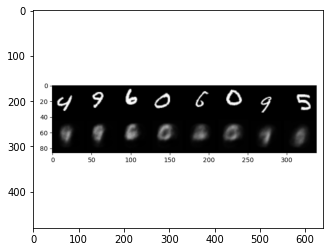

bs= 512, lr=0.01000, wd=0.00001 rec_weights=1.00000 train_mn: 0.9999, valid_mn: 0.9927, valid_an: 0.8437
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_10_54_18_0x1dd9


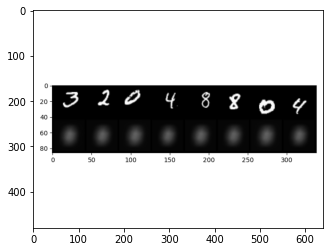

bs= 512, lr=0.00100, wd=0.00010 rec_weights=1.00000 train_mn: 1.0000, valid_mn: 0.9904, valid_an: 0.8484
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_29_40_0xd4b


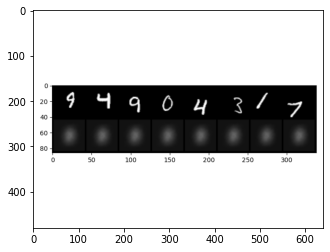

bs= 512, lr=0.00100, wd=0.00010 rec_weights=0.10000 train_mn: 0.9999, valid_mn: 0.9924, valid_an: 0.8622
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_37_01_0x621


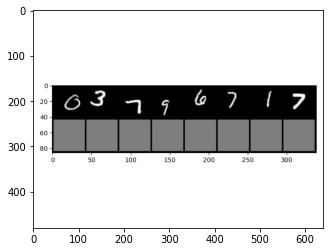

bs= 512, lr=0.00100, wd=0.00010 rec_weights=0.01000 train_mn: 0.9998, valid_mn: 0.9925, valid_an: 0.8624
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_41_18_0x1790


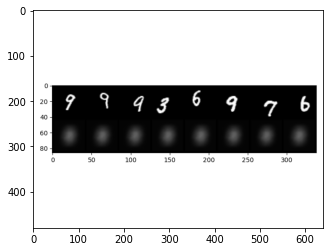

bs= 512, lr=0.01000, wd=0.00010 rec_weights=1.00000 train_mn: 0.9997, valid_mn: 0.9887, valid_an: 0.8506
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_11_52_04_0x1a7b


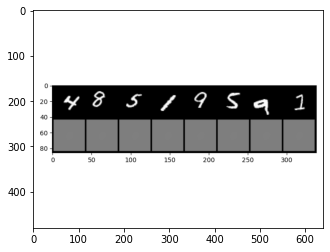

bs= 512, lr=0.01000, wd=0.00010 rec_weights=0.01000 train_mn: 0.9996, valid_mn: 0.9905, valid_an: 0.8552
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_12_06_56_0x9d7


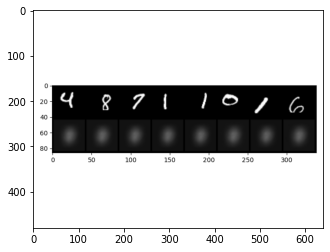

bs= 512, lr=0.00100, wd=0.00100 rec_weights=1.00000 train_mn: 0.9999, valid_mn: 0.9905, valid_an: 0.8658
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_12_54_23_0x140b


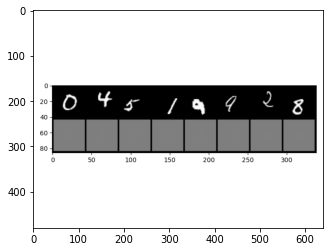

bs= 512, lr=0.00100, wd=0.00100 rec_weights=0.10000 train_mn: 0.9999, valid_mn: 0.9905, valid_an: 0.8669
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_13_02_41_0x2432


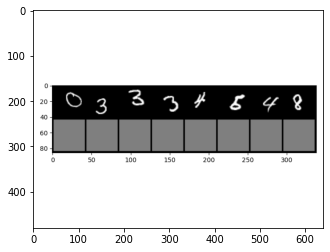

bs= 512, lr=0.00100, wd=0.00100 rec_weights=0.01000 train_mn: 0.9999, valid_mn: 0.9912, valid_an: 0.8769
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_13_11_10_0x1d58


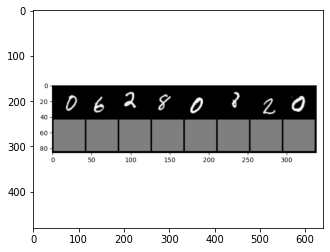

bs= 512, lr=0.00100, wd=0.00100 rec_weights=0.00100 train_mn: 0.9999, valid_mn: 0.9906, valid_an: 0.8686
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_13_19_32_0x7f


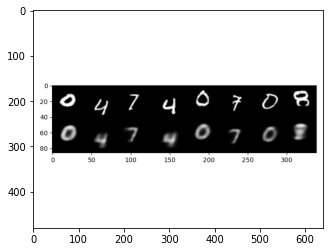

bs= 512, lr=0.00100, wd=0.00000 rec_weights=1.00000 train_mn: 0.9998, valid_mn: 0.9922, valid_an: 0.8409
/mnt/experiments/effcn/affnist/effcn_affnist_2021_12_06_14_48_18_0x10f6


In [20]:
show_nans = False
show_acc = True
for config, _, _ in runs_success:
    p_stats = Path(config.paths.experiments) / config.names.model_dir / config.names.stats_file
    p_imgs = Path(config.paths.experiments) / config.names.model_dir / config.names.img_dir
    if not p_stats.exists():
        print("Does not exist: {}".format(p_stats))
    with open(p_stats, "rb") as file:
        stats = pickle.load(file)
    train_loss = stats["train"]["loss"][-1]
    if math.isnan(train_loss) and show_nans:
        print("bs={:4d}, lr={:.5f}, wd={:.5f}".format(config.train.batch_size, config.optimizer_args.lr, config.optimizer_args.weight_decay))
        #print(max(stats["valid"]["affnist"]["acc"]), stats["notes"], stats["train"]["loss"][-1])
    elif show_acc:
        max_acc_train = max(stats["train"]["acc"])
        max_valid_an = max(stats["valid"]["affnist"]["acc"])
        max_valid_mn = max(stats["valid"]["mnist"]["acc"])
        if max_valid_an < 0.84:
            continue
        if len(stats["notes"]) > 0 and "nan" in stats["notes"]:
            continue
        epoch_idx = stats["train"]["epoch"][-1]
        p_img = p_imgs / "img_train_{:03d}.png".format(epoch_idx)
        img = mpimg.imread(p_img)
        imgplot = plt.imshow(img)
        plt.show()
        print("bs={:4d}, lr={:.5f}, wd={:.5f} rec_weights={:.5f} train_mn: {:.4f}, valid_mn: {:.4f}, valid_an: {:.4f}".format(
            config.train.batch_size,
            config.optimizer_args.lr,
            config.optimizer_args.weight_decay,
            config.loss.rec.weight,
            max_acc_train,
            max_valid_mn,
            max_valid_an,
            
             )
             )
        #print("\t", config.paths.experiments)
        print(Path(config.paths.experiments) / config.names.model_dir)

In [ ]:
p_img.exists()

In [ ]:
stats["train"]["epoch"][-1]